Machine Learning Assignment 2 - Classification Models  
Name: SRI RAMANAN K  
ID: 2025AA05557


Overview
1. Load and explore the Diabetes Health Indicator dataset.
2. Preprocess the data
3. Implement 6 Classification Models:
    - Logistic Regression
    - Decision Tree Classifier
    - K-Nearest Neighbors (KNN)
    - Naive Bayes
    - Random Forest Classifier
    - XGBoost Classifier
4. Evaluate each model using Accuracy, AUC, Precision, Recall, F1 Score, and MCC.
5. Compare the performance of all models.

Dataset: The dataset chosen is Diabetes Health Indicators Dataset (50-50 split and binary class variant) from Kaggle.
- Target Variable: Diabetes_binary (0 = no diabetes, 1 = pre-diabetes or diabetes)
- Features: 21 health indicators like Age, BMI, Smoker etc.
- Dataset size: More than 70,000 records.


In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef
# Using imported models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

Loading Data

In [3]:
# Load the dataset
file_path = "/home/cloud/Desktop/ML assignment 2/project-folder/data_large.csv"
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print(f"Shape: {data.shape}")
except FileNotFoundError:
    print("File not found. Please check the path.")

data.head()

Dataset loaded successfully.
Shape: (70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


Exploratory Data Analysis (EDA)

In [4]:
data.info()
#All are numerical features, no encoding needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [5]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())
#No missing values in any column

Missing values in each column:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


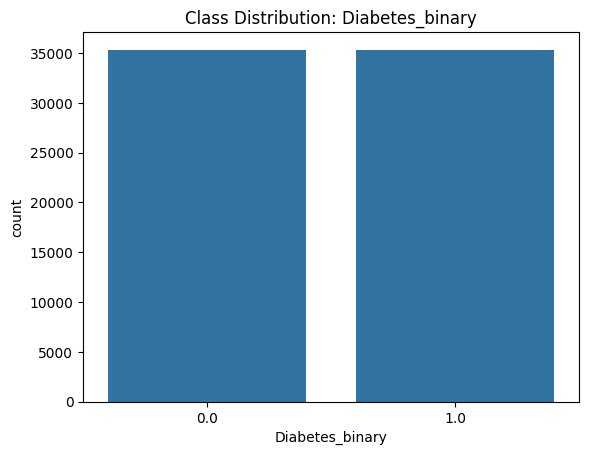

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


In [6]:
# Check class balance
sns.countplot(x='Diabetes_binary', data=data)
plt.title('Class Distribution: Diabetes_binary')
plt.show()
#It is a balanced dataset
print(data['Diabetes_binary'].value_counts())

EDA - Correlation Heatmap

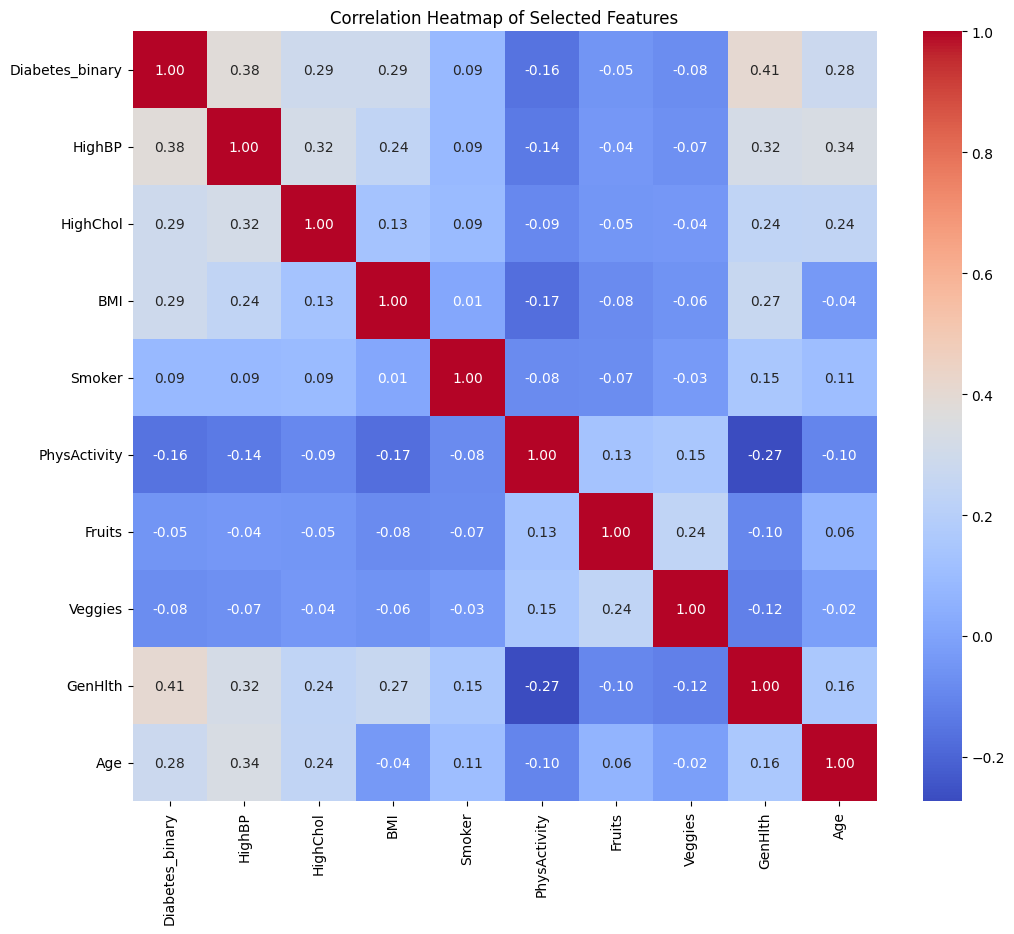

In [7]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
# Choosing a subset of features
cols_to_plot = ['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 
                'PhysActivity', 'Fruits', 'Veggies', 'GenHlth', 'Age',]
sns.heatmap(data[cols_to_plot].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()
#HighBP, BMI, GenHlth have  positive correlation with output
#PhysActivity has slight negative correlation with output
#Model is expected to learn these

4. Data Preprocessing

In [8]:
# Separate Features and Target
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (56553, 21)
Test set size: (14139, 21)


In [9]:
# Feature Scaling (Standardization)
# KNN, Logistic Regression and SVM need scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.881159,-1.052422,0.158387,-0.119897,1.050409,-0.256106,-0.415678,0.650525,0.795861,0.518296,...,0.218147,-0.321472,-0.749541,-0.459731,-0.575632,-0.580284,1.090144,0.496401,1.051358,1.057370
1,-1.134869,0.950189,0.158387,-0.822423,1.050409,-0.256106,-0.415678,0.650525,-1.256502,0.518296,...,0.218147,-0.321472,0.149098,1.386706,0.023063,-0.580284,-0.917310,-0.555625,0.080434,-2.162394
2,0.881159,-1.052422,0.158387,1.706673,1.050409,-0.256106,-0.415678,0.650525,0.795861,0.518296,...,0.218147,-0.321472,0.149098,-0.459731,0.422192,1.723295,-0.917310,0.847076,0.080434,-0.782495
3,0.881159,0.950189,0.158387,0.020609,-0.952010,-0.256106,2.405711,0.650525,0.795861,0.518296,...,0.218147,-0.321472,0.149098,-0.459731,-0.475849,-0.580284,-0.917310,0.496401,0.080434,-0.322529
4,0.881159,-1.052422,0.158387,0.723136,1.050409,-0.256106,-0.415678,0.650525,0.795861,0.518296,...,0.218147,-0.321472,0.149098,-0.459731,-0.575632,-0.580284,1.090144,-0.906300,-0.890490,-0.322529


Model Implementation & Evaluation


In [10]:
# Function to evaluate model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = y_pred
        
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    print(f"--- {model_name} Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")
    print("\n")
    
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MCC": mcc,
        "Model_Obj": model
    }

results = []

In [11]:
import os
import joblib

if not os.path.exists('model'):
    os.makedirs('model')
    print("Created 'model' directory.")
else:
    print("'model' directory already exists.")

'model' directory already exists.


1. Logistic Regression

In [12]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
res = evaluate_model(lr_model, X_test_scaled, y_test, "Logistic Regression")
results.append(res)
# Save model
joblib.dump(res['Model_Obj'], 'model/logistic_regression.pkl')

--- Logistic Regression Results ---
Accuracy: 0.7458
AUC: 0.8232
Precision: 0.7372
Recall: 0.7639
F1 Score: 0.7503
MCC: 0.4919




['model/logistic_regression.pkl']

2. Decision Tree Classifier

In [13]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
res = evaluate_model(dt_model, X_test_scaled, y_test, "Decision Tree")
results.append(res)
# Save model
joblib.dump(res['Model_Obj'], 'model/decision_tree.pkl')

--- Decision Tree Results ---
Accuracy: 0.6516
AUC: 0.6518
Precision: 0.6556
Recall: 0.6387
F1 Score: 0.6470
MCC: 0.3033




['model/decision_tree.pkl']

3. K-Nearest Neighbor (KNN)

In [14]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
res = evaluate_model(knn_model, X_test_scaled, y_test, "KNN")
results.append(res)
# Save model
joblib.dump(res['Model_Obj'], 'model/knn.pkl')

--- KNN Results ---
Accuracy: 0.7130
AUC: 0.7713
Precision: 0.7024
Recall: 0.7390
F1 Score: 0.7203
MCC: 0.4266




['model/knn.pkl']

4. Naive Bayes (Gaussian)

In [15]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
res = evaluate_model(nb_model, X_test_scaled, y_test, "Naive Bayes")
results.append(res)
# Save model
joblib.dump(res['Model_Obj'], 'model/naive_bayes.pkl')

--- Naive Bayes Results ---
Accuracy: 0.7153
AUC: 0.7837
Precision: 0.7206
Recall: 0.7032
F1 Score: 0.7118
MCC: 0.4308




['model/naive_bayes.pkl']

5. Random Forest (Ensemble)

In [16]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
res = evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest")
results.append(res)
# Save model
joblib.dump(res['Model_Obj'], 'model/random_forest.pkl')

--- Random Forest Results ---
Accuracy: 0.7331
AUC: 0.8099
Precision: 0.7176
Recall: 0.7687
F1 Score: 0.7423
MCC: 0.4675




['model/random_forest.pkl']

6. XGBoost (Ensemble)

In [17]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
res = evaluate_model(xgb_model, X_test_scaled, y_test, "XGBoost")
results.append(res)
# Save model
joblib.dump(res['Model_Obj'], 'model/xgboost.pkl')

--- XGBoost Results ---
Accuracy: 0.7483
AUC: 0.8247
Precision: 0.7291
Recall: 0.7901
F1 Score: 0.7584
MCC: 0.4983




['model/xgboost.pkl']

6. Comparison & Observations

In [18]:
results_new = []
for res in results:
    temp_res = res.copy()
    del temp_res['Model_Obj']
    results_new.append(temp_res)

comparison_df = pd.DataFrame(results_new)
comparison_df = comparison_df.set_index('Model')
comparison_df

,Accuracy,AUC,Precision,Recall,F1 Score,MCC
Model,,,,,,
Logistic Regression,0.745809,0.823219,0.737201,0.763899,0.750313,0.491943
Decision Tree,0.651602,0.651827,0.655583,0.638704,0.647034,0.303303
KNN,0.712992,0.771325,0.702434,0.739001,0.720254,0.426565
Naive Bayes,0.715326,0.783692,0.720644,0.703211,0.711821,0.430778
Random Forest,0.733149,0.809851,0.717644,0.768708,0.742299,0.467486
XGBoost,0.748285,0.824727,0.729112,0.790069,0.758368,0.498317


### Model Performance Observations

| ML Model Name | Observation about model performance |
|---|---|
| **Logistic Regression** | Performed very well (approx 75% accuracy), indicating a linear relationship works well for this data. Shows that there is not much non-linearity present in the dataset. |
| **Decision Tree** | Lowest performance (approx 65% accuracy), likely due to overfitting on the training data. Decision trees are usually prone to overfitting. |
| **KNN** | Moderate performance (71% accuracy), but can be computationally expensive and sensitive to the scale of data. |
| **Naive Bayes** | Good performance and fast to train, but assumes independence between features which might not be accurate as there are correlated features. |
| **Random Forest (Ensemble)** | Improved significantly over Decision Tree (approx 73% accuracy) by reducing variance, showing the power of bagging. |
| **XGBoost (Ensemble)** |  Best model for this dataset, alongside Logistic Regression, effectively capturing complex patterns through boosting. Accuracy is around 74% which is on par with logistic regression. But Recall is better (79%), and recall is the metric to look out for in medical field. |
